In [1]:
from IPython.display import Latex

from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

R = 9.8e3
l = np.array([0, 10, 20, 30, 40])
f = lambda t, v_0, A, tau: v_0 + A*np.exp(-t/tau)

pp = PdfPages('multipage.pdf')

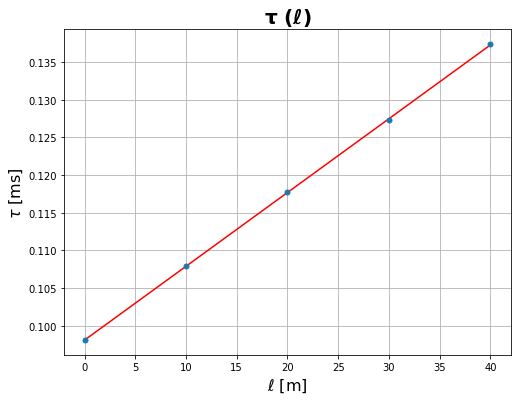

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [2]:
plt.rcParams['figure.figsize'] = (8,6)

tau = []
delta_tau = []
for i in range(5):
    tau_ = []
    for j in range(5):
        df = pd.read_csv(f'data/c_{i*5+j}.csv', skiprows=1).dropna()
        x = df.second.values
        y = df['Volt.1'].values
        popt, pcov = curve_fit(f, x, y)
        tau_.append(popt[2])
    tau.append(np.mean(tau_)*1e3)
    delta_tau.append(np.std(tau_)*1e3)

g = lambda l, c_0, c_prime: c_0 + c_prime*l
popt, pcov = curve_fit(g, l, tau)
perr = np.sqrt(np.diag(pcov))

plt.errorbar(l, tau, yerr=delta_tau, fmt='.', ms=10)
plt.plot(l, g(l, *popt), color='r')
plt.title('$\mathbf{\\tau\ (\ell)}$', fontsize=20)
plt.xlabel('$\\ell$ [m]', fontsize=16)
plt.ylabel('$\\tau$ [ms]', fontsize=16)
plt.grid()
pp.savefig()
plt.show()

display(Latex(f'$C\' = ({popt[1]*1e9/R:.1f} \pm {perr[1]*1e9/R:.1f})$ pF'))
display(Latex(f'$C_0 = ({popt[0]*1e6/R:.2f} \pm {perr[0]*1e6/R:.2f})$ nF'))

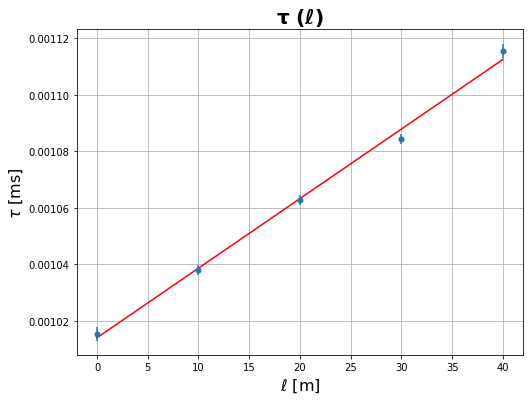

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [3]:
plt.rcParams['figure.figsize'] = (8,6)

tau = []
delta_tau = []
for i in range(5):
    tau_ = []
    for j in range(5):
        df = pd.read_csv(f'data/l_{i*5+j}.csv', skiprows=1).dropna()
        x = df.second.values
        y = df['Volt.1'].values
        popt, pcov = curve_fit(f, x, y, p0=[1,1,1e-6])
        tau_.append(popt[2])
    tau.append(np.mean(tau_)*1e3)
    delta_tau.append(np.std(tau_)*1e3)

R_l = 97
g = lambda l, L_0, L_prime: (1/R_l)*(L_0 + L_prime*l)
popt, pcov = curve_fit(g, l, tau)
perr = np.sqrt(np.diag(pcov))

plt.errorbar(l, tau, yerr=delta_tau, fmt='.', ms=10)
plt.plot(l, g(l, *popt), color='r')
plt.title('$\mathbf{\\tau\ (\ell)}$', fontsize=20)
plt.xlabel('$\\ell$ [m]', fontsize=16)
plt.ylabel('$\\tau$ [ms]', fontsize=16)
plt.grid()
pp.savefig()
plt.show()

display(Latex(f'$L\' = ({popt[1]*1e3:.3f} \pm {perr[1]*1e3:.3f})\ \\frac{{\mu H}}{{m}}$'))
display(Latex(f'$L_0 = ({popt[0]*1e3:.1f} \pm {perr[0]*1e3:.1f})\ \mu H$'))